# Coverage Analysis

In [7]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('tableau-colorblind10')

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from analysis import MultiAnalysis
from experiment import Experiment


data_path = "../data"
save_path = "../figs"

### Basic Plots

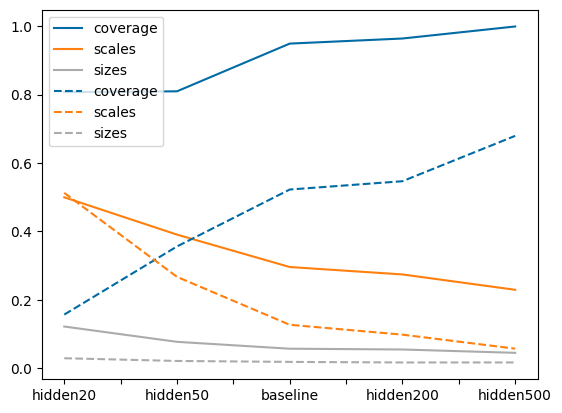

In [2]:
hiddens = [f'hidden{n}' for n in [20, 50, 200, 500]]
hiddens.insert(2, 'baseline')

ma = MultiAnalysis(data_path, hiddens)
xticks = [20, 50, 128, 200, 500]
xlabel = 'Hidden Layer Size'

ma.plot_coverage_stats()

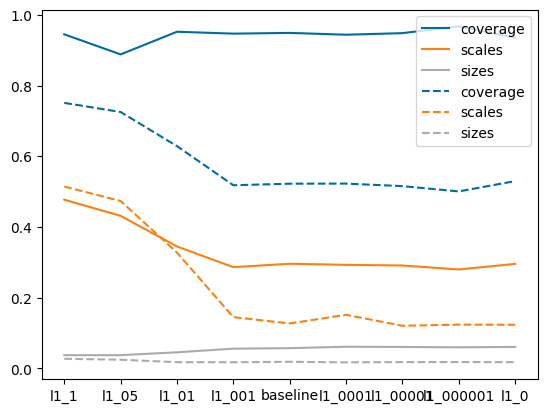

In [3]:
l1s = [f'l1_{n}' for n in ['1', '05', '01', '001', '0001', '00001', '000001', '0']]
l1s.insert(4, 'baseline')

ma = MultiAnalysis(data_path, l1s)
xticks = [1, 0.5, 0.1, 0.01, 0.005, 0.001, 0.0001, 0.00001, 0]
xlabel = 'Weight Regularizatin $\\lambda_{l1}$'

ma.plot_coverage_stats()

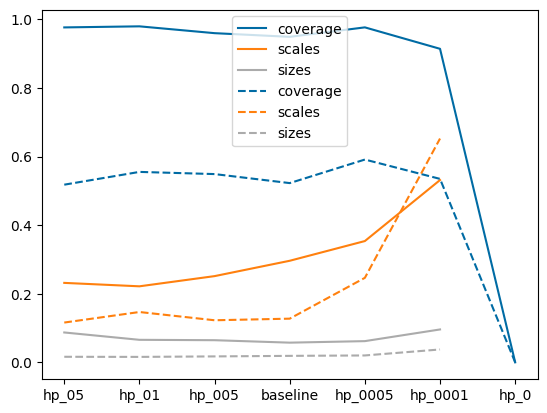

In [4]:
hps = [f'hp_{n}' for n in ['05', '01', '005', '0005', '0001', '0']]
hps.insert(3, 'baseline')

ma = MultiAnalysis(data_path, hps)
xticks = [0.5, 0.1, 0.05, 0.02, 0.005, 0.001, 0]
xlabel = 'Hidden Penalty $\\lambda_{hp}$'

ma.plot_coverage_stats()

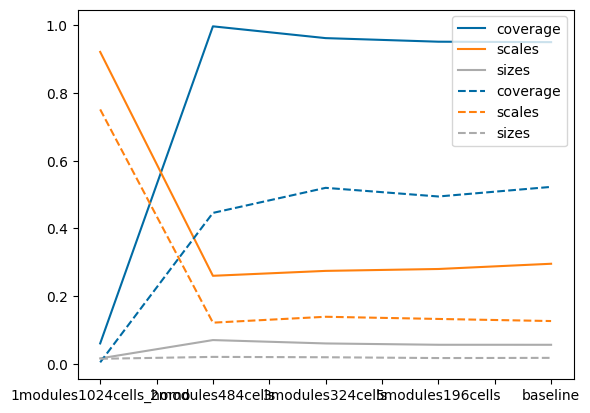

In [5]:
modules = ['1modules1024cells_homo', '2modules484cells', '3modules324cells', '5modules196cells', 'baseline']

ma = MultiAnalysis(data_path, modules)
xticks = [1, 2, 3, 5, 10]
xlabel = 'Number of Modules'

ma.plot_coverage_stats()

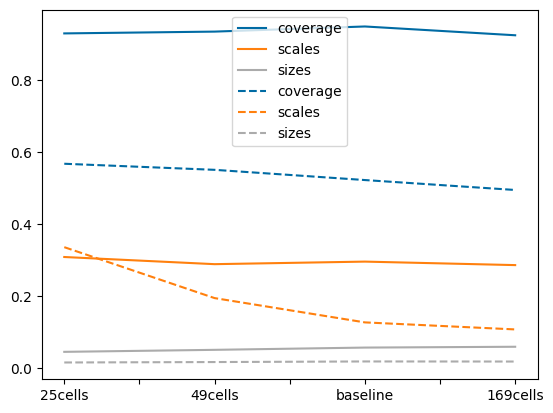

In [6]:
cells = ['25cells', '49cells', 'baseline', '169cells']

ma = MultiAnalysis(data_path, cells)
xticks = np.asarray([25, 49, 100, 169]) * 10
xlabel = 'Number of Grid Cells'

ma.plot_coverage_stats()

### Useful Plot

In [3]:
exp = Experiment.load_experiment(data_path, 'baseline/0')

In [4]:
exp.compile_grid_cells(1)
exp.load_pfs()

In [5]:
coverage = exp.pfs.get_coverage()[exp.pfs.get_place_cells()].sum(0).cpu()
hiddens = exp.pfs.targets[exp.pfs.get_active_cells()].sum(0).cpu()

In [7]:
exp.compile_grid_cells(2)
exp.load_pfs()

In [8]:
coverage_remap = exp.pfs.get_coverage()[exp.pfs.get_place_cells()].sum(0).cpu()

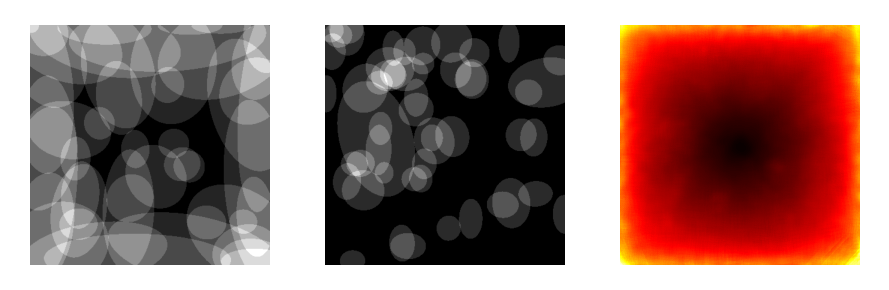

In [10]:
_, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(9, 3))

ax1.imshow(coverage, cmap='gray')
ax1.axis('off')
ax1.axis('equal')

ax2.imshow(coverage_remap, cmap='gray')
ax2.axis('off')
ax2.axis('equal')

ax3.imshow(hiddens, cmap='hot')
ax3.axis('off')
ax3.axis('equal')

plt.tight_layout()
plt.savefig('../figs/coverage.png')
plt.show()

In [44]:
(exp.pfs.predict()[exp.pfs.get_place_cells()].sum(0) > 1-4).all()

tensor(True, device='cuda:0')

### Statistics